### Semana 06 - lec 01 - exemplos

  - Iris dataset



In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### Iris

In [2]:
fname  = os.path.join("../data/", 'Iris.csv')
df = pd.read_csv(fname)

In [3]:
print(df.shape)
df.columns

(150, 6)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.columns = ['id', 'sepal_len', 'sepal_width', 'petal_len', 'petalwidth', 'species']
df = df[ ['id', 'species', 'sepal_len', 'sepal_width', 'petal_len', 'petalwidth'] ]
df.head(3)

,id,species,sepal_len,sepal_width,petal_len,petalwidth
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2


In [5]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Groupby

In [6]:
dfg = df.groupby('species')
for spc, dfa in dfg:
    print(spc)
    print(dfa.iloc[:3])
    print('')

Iris-setosa
   id      species  sepal_len  sepal_width  petal_len  petalwidth
0   1  Iris-setosa        5.1          3.5        1.4         0.2
1   2  Iris-setosa        4.9          3.0        1.4         0.2
2   3  Iris-setosa        4.7          3.2        1.3         0.2

Iris-versicolor
    id          species  sepal_len  sepal_width  petal_len  petalwidth
50  51  Iris-versicolor        7.0          3.2        4.7         1.4
51  52  Iris-versicolor        6.4          3.2        4.5         1.5
52  53  Iris-versicolor        6.9          3.1        4.9         1.5

Iris-virginica
      id         species  sepal_len  sepal_width  petal_len  petalwidth
100  101  Iris-virginica        6.3          3.3        6.0         2.5
101  102  Iris-virginica        5.8          2.7        5.1         1.9
102  103  Iris-virginica        7.1          3.0        5.9         2.1



In [7]:
df.groupby('species').sepal_len.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_len, dtype: float64

### Media de vários campos

In [8]:
df.groupby('species')[ ['sepal_len', 'sepal_width'] ].mean()

,sepal_len,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


### Outra forma de fazer medias

In [9]:
df.groupby('species').agg({'sepal_len': 'mean', 'sepal_width': 'mean'})

,sepal_len,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


### Várias operações simultâneas

In [10]:
ops = ['mean', 'median', 'std', 'count', 'min', 'max']

dfg = df.groupby('species').agg({'sepal_len': ops, 'sepal_width': ops})
dfg

sepal_len                                  sepal_width         \
                     mean median       std count  min  max        mean median   
species                                                                         
Iris-setosa         5.006    5.0  0.352490    50  4.3  5.8       3.418    3.4   
Iris-versicolor     5.936    5.9  0.516171    50  4.9  7.0       2.770    2.8   
Iris-virginica      6.588    6.5  0.635880    50  4.9  7.9       2.974    3.0   

                                           
                      std count  min  max  
species                                    
Iris-setosa      0.381024    50  2.3  4.4  
Iris-versicolor  0.313798    50  2.0  3.4  
Iris-virginica   0.322497    50  2.2  3.8

### Groupby.agg() é uma tabela

In [11]:
dftab = dfg.reset_index()
dftab.columns

MultiIndex([(    'species',       ''),
            (  'sepal_len',   'mean'),
            (  'sepal_len', 'median'),
            (  'sepal_len',    'std'),
            (  'sepal_len',  'count'),
            (  'sepal_len',    'min'),
            (  'sepal_len',    'max'),
            ('sepal_width',   'mean'),
            ('sepal_width', 'median'),
            ('sepal_width',    'std'),
            ('sepal_width',  'count'),
            ('sepal_width',    'min'),
            ('sepal_width',    'max')],
           )

In [12]:
for a,b in dftab.columns:
    print(a,b)

species 
sepal_len mean
sepal_len median
sepal_len std
sepal_len count
sepal_len min
sepal_len max
sepal_width mean
sepal_width median
sepal_width std
sepal_width count
sepal_width min
sepal_width max


In [13]:
cols = []

for a,b in dftab.columns:
    if a == 'species':
        cols.append(a)
    else:
        cols.append(a + '_' + b)
        
cols

['species',
 'sepal_len_mean',
 'sepal_len_median',
 'sepal_len_std',
 'sepal_len_count',
 'sepal_len_min',
 'sepal_len_max',
 'sepal_width_mean',
 'sepal_width_median',
 'sepal_width_std',
 'sepal_width_count',
 'sepal_width_min',
 'sepal_width_max']

In [14]:
dftab.columns = cols
dftab.head(4)

,species,sepal_len_mean,sepal_len_median,sepal_len_std,sepal_len_count,sepal_len_min,sepal_len_max,sepal_width_mean,sepal_width_median,sepal_width_std,sepal_width_count,sepal_width_min,sepal_width_max
0,Iris-setosa,5.006,5.0,0.352490,50,4.3,5.8,3.418,3.4,0.381024,50,2.3,4.4
1,Iris-versicolor,5.936,5.9,0.516171,50,4.9,7.0,2.770,2.8,0.313798,50,2.0,3.4
2,Iris-virginica,6.588,6.5,0.635880,50,4.9,7.9,2.974,3.0,0.322497,50,2.2,3.8


### Como calcula o SEM?

### Boxplot

https://seaborn.pydata.org/examples/grouped_boxplot.html

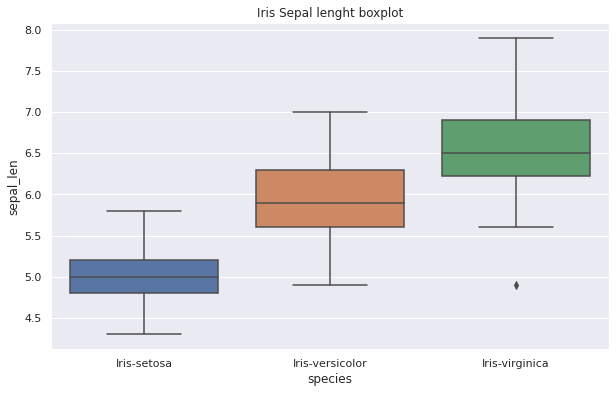

In [15]:
sns.set(rc={"figure.figsize": (10,6)})

sns.boxplot(x="species", y="sepal_len", data=df)

plt.title("Iris Sepal lenght boxplot");

### Multiplos plots

In [16]:
print(df.columns)

measures = ['sepal_len', 'sepal_width', 'petal_len', 'petalwidth']
measures

Index(['id', 'species', 'sepal_len', 'sepal_width', 'petal_len', 'petalwidth'], dtype='object')


['sepal_len', 'sepal_width', 'petal_len', 'petalwidth']

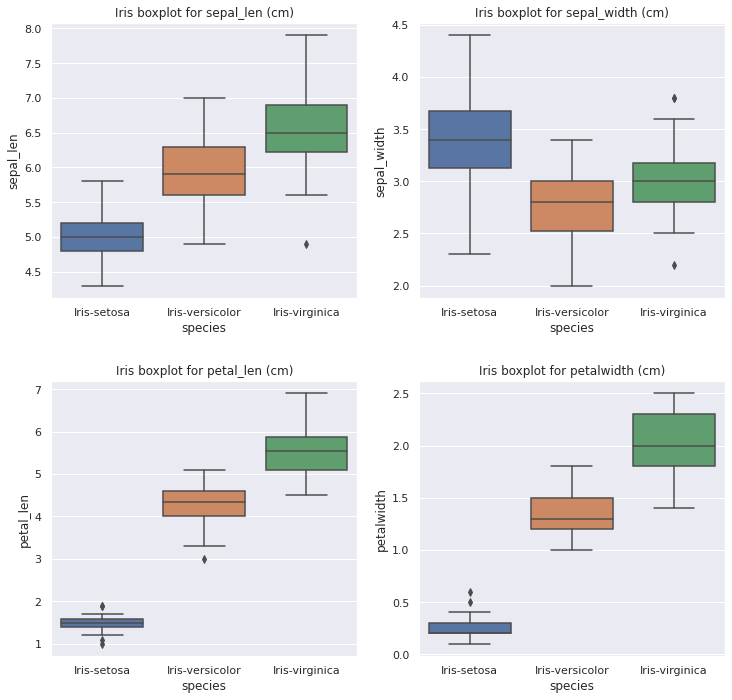

In [17]:
from pylab import subplot

sns.set(rc={"figure.figsize": (12,11)})


nfig = 0
for meas in measures:
    nfig += 1
    subplot(2,2,nfig)
    sns.boxplot(x="species", y=meas, data=df)
    plt.title("Iris boxplot for %s (cm)"%meas);
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3) ;

### Violin plot

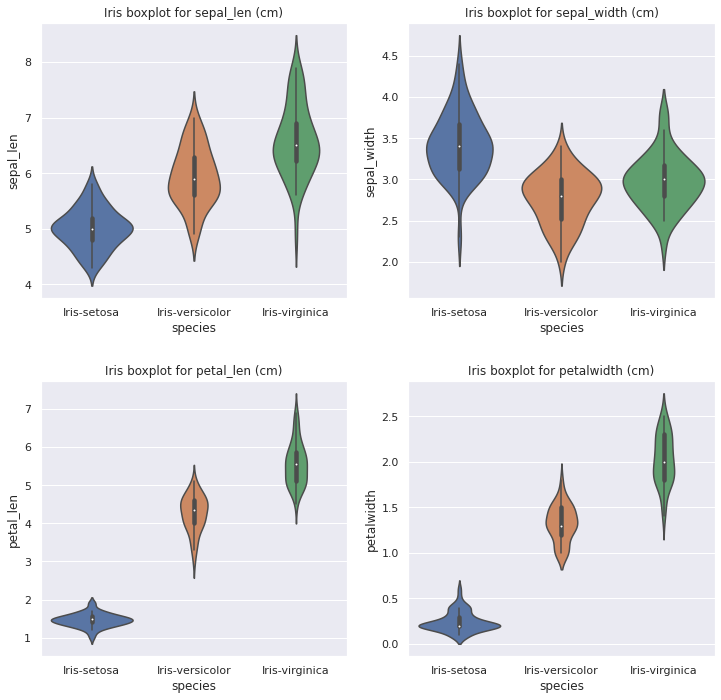

In [18]:
from pylab import subplot

sns.set(rc={"figure.figsize": (12,11)})


nfig = 0
for meas in measures:
    nfig += 1
    subplot(2,2,nfig)
    sns.violinplot(x="species", y=meas, data=df)
    plt.title("Iris boxplot for %s (cm)"%meas);
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3) ;    

### Correlation

In [ ]:
# sns.color_palette("Set2")
# colors = ['blue', 'cyan', 'red', 'orange']
sns.pairplot(df[measures]);

### Heatmap

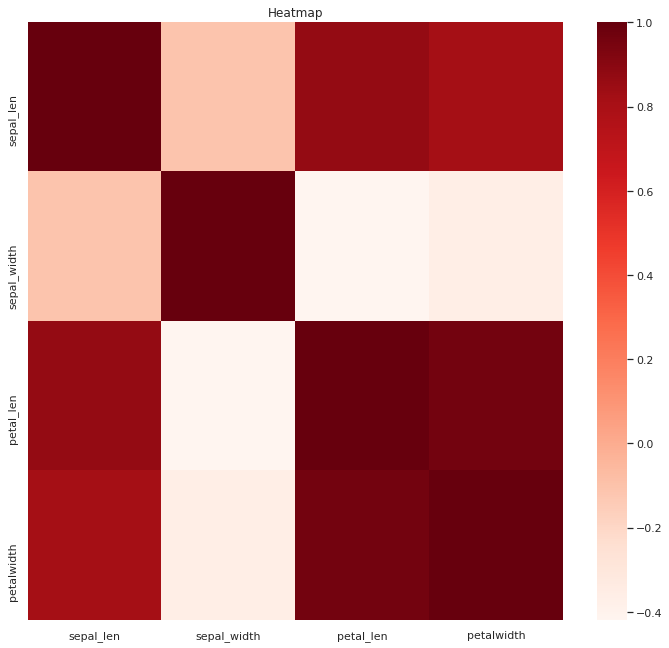

In [20]:
plt.title("Heatmap")
sns.heatmap(df[measures].corr(), cmap='Reds');